In [1]:
import torch
import os

import sys
sys.path.append('../')

import evaluation as eval
from core.model import WaveLSTM

path_results = "/home/hexa/ejmcmk/results"
folder_name = "model_lstm_test_save_2"
save_dir = os.path.join(path_results, folder_name)

model = WaveLSTM.load_from_checkpoint(os.path.join(save_dir, 'model.ckpt'))
model.eval()

/home/hexa/miniconda3/envs/research/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:62: FutureWarning: Importing `PeakSignalNoiseRatio` from `torchmetrics` was deprecated and will be removed in 2.0. Import `PeakSignalNoiseRatio` from `torchmetrics.image` instead.
  _future_warning(
/home/hexa/miniconda3/envs/research/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:62: FutureWarning: Importing `StructuralSimilarityIndexMeasure` from `torchmetrics` was deprecated and will be removed in 2.0. Import `StructuralSimilarityIndexMeasure` from `torchmetrics.image` instead.
  _future_warning(


WaveLSTM(
  (arch): LSTM(55112, 256, batch_first=True)
  (linear): Sequential(
    (0): Linear(in_features=256, out_features=55112, bias=True)
    (1): Tanh()
  )
  (train_psnr): _PeakSignalNoiseRatio()
  (train_ssim): _StructuralSimilarityIndexMeasure()
  (val_psnr): _PeakSignalNoiseRatio()
  (val_ssim): _StructuralSimilarityIndexMeasure()
)

In [2]:
data = torch.load('../../../data/slices_dataset.pt')

In [3]:
sample_idx = 0
ground_truth = data['near_fields'][sample_idx, :, :, :, 1:6]
sample = data['near_fields'][sample_idx, :, :, :, 0:5].unsqueeze(0).permute(0, 4, 1, 2, 3)
sample = sample.reshape(1, 5, -1)

print(ground_truth.shape)
print(sample.shape)

torch.Size([2, 166, 166, 5])
torch.Size([1, 5, 55112])


In [4]:
import inference

#preds = inference.predict_sequence(model, sample, num_steps=5)
preds = inference.predict_next_field(model, sample)

print(preds.shape)

torch.Size([1, 5, 55112])
torch.Size([2, 166, 166, 5])


Evaluation item saved to /home/hexa/ejmcmk/results/model_lstm_test_save_2/dft_plots/sequence_comparison_mag_Prediction vs Ground Truth.pdf


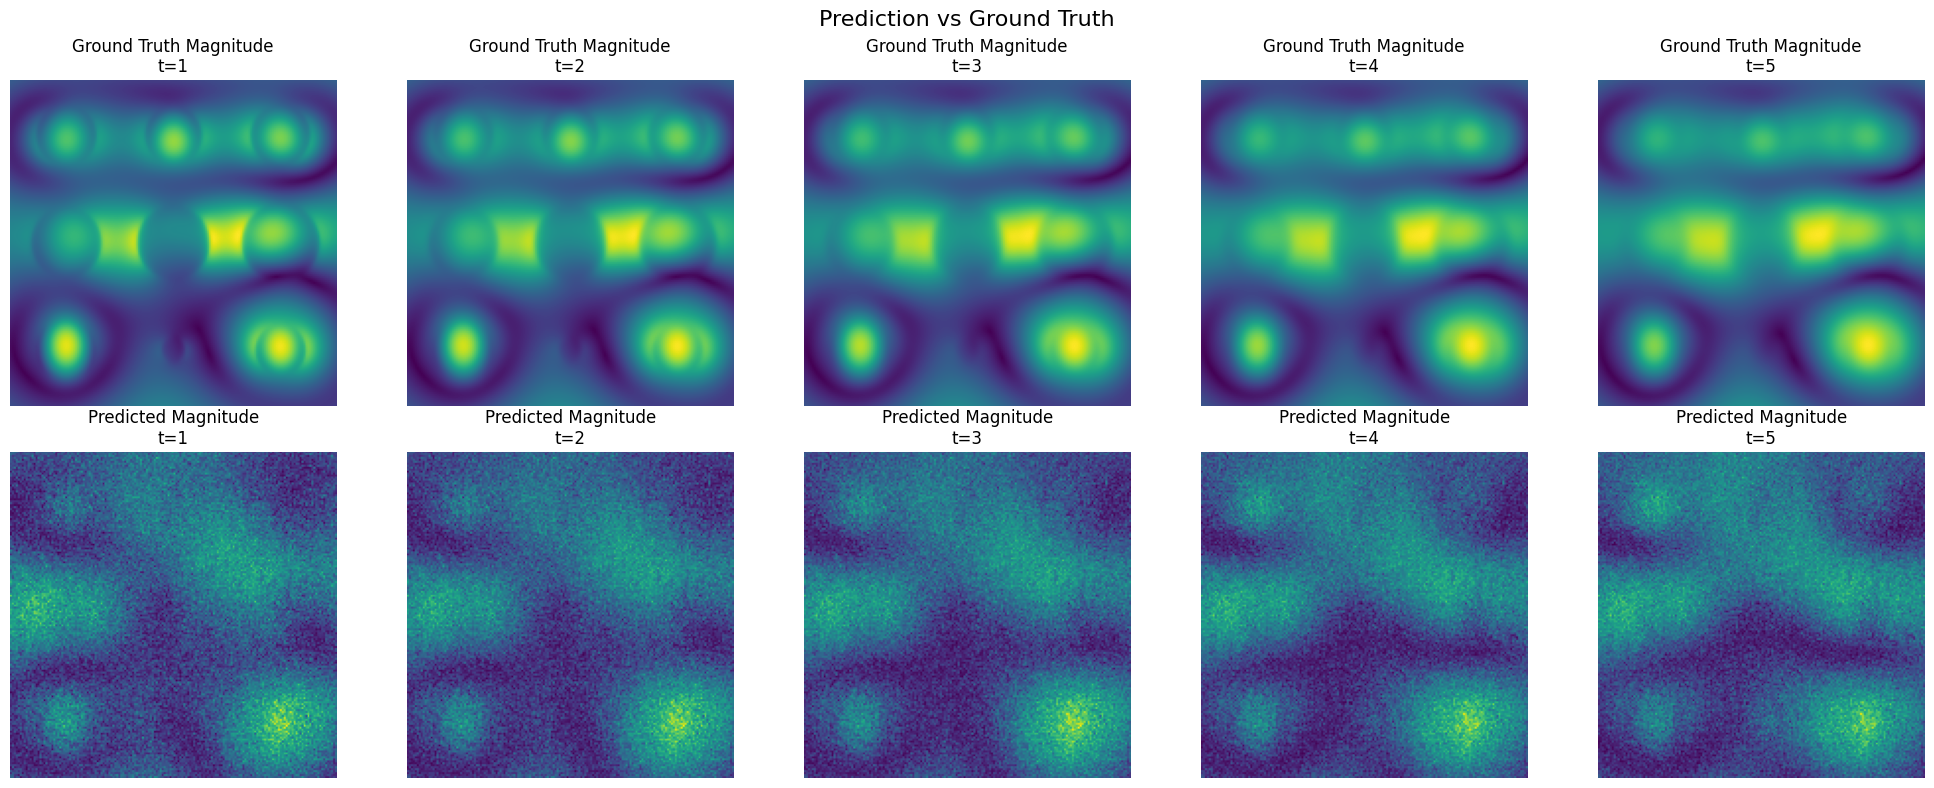

Evaluation item saved to /home/hexa/ejmcmk/results/model_lstm_test_save_2/dft_plots/sequence_comparison_phase_Prediction vs Ground Truth.pdf


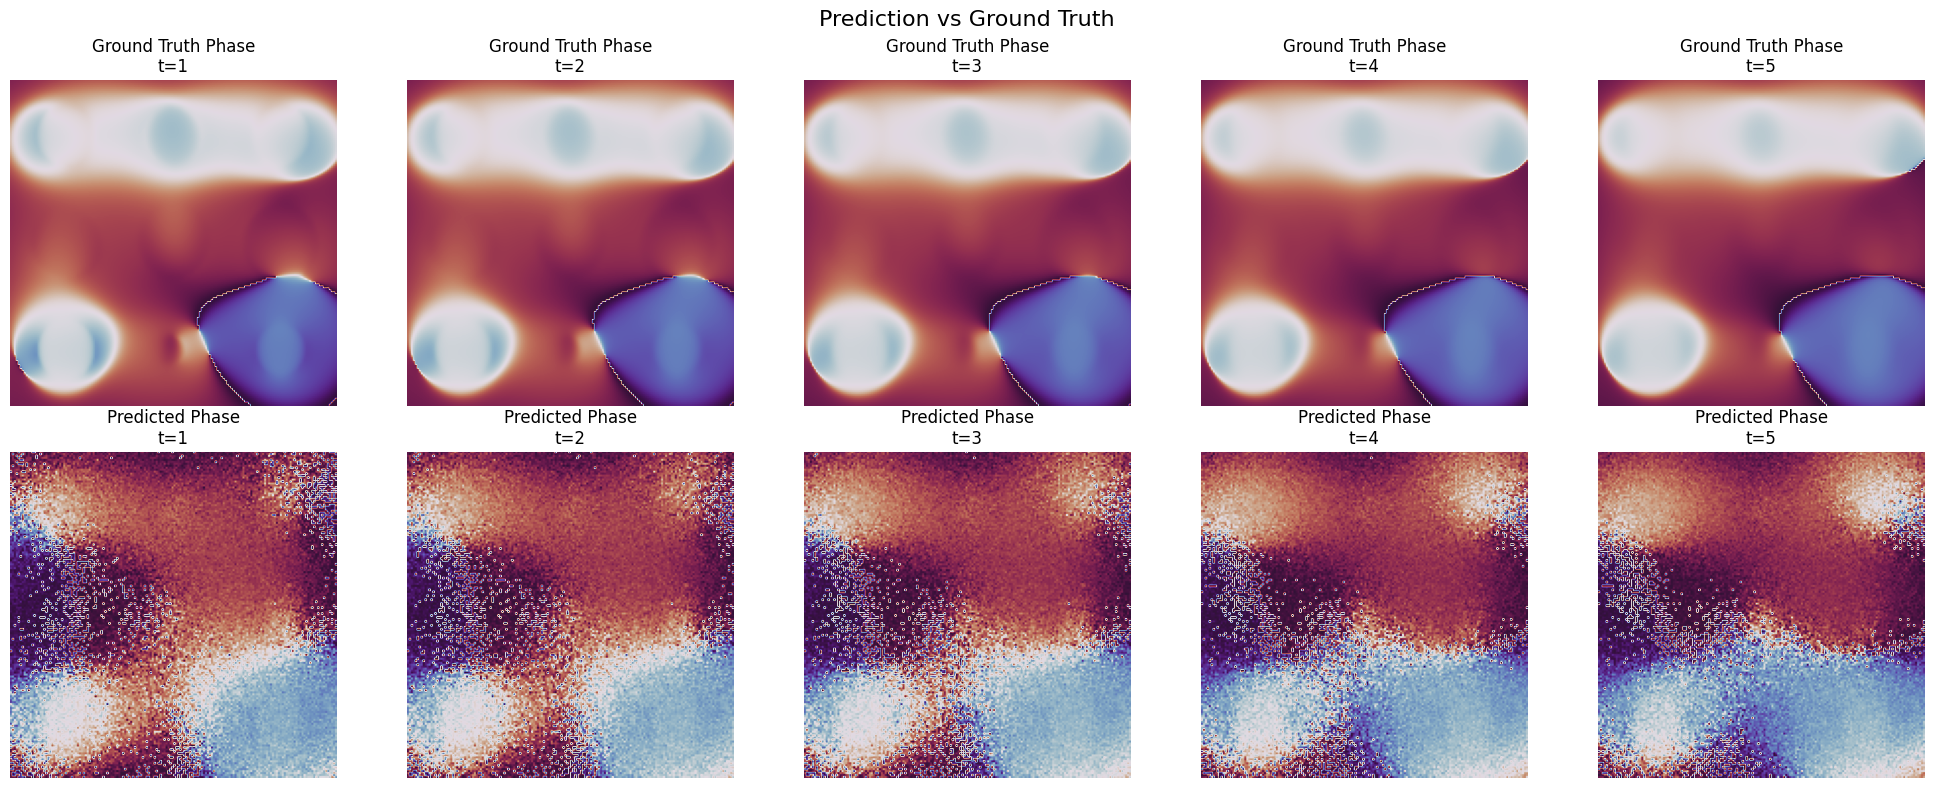

In [6]:
title = "Prediction vs Ground Truth"
eval.plot_sequence_comparison(preds, ground_truth, view='mag', save_fig=True, save_dir=save_dir, title=title)
eval.plot_sequence_comparison(preds, ground_truth, view='phase', save_fig=True, save_dir=save_dir, title=title)

In [7]:
import utils.visualize as viz

'''preds_path = os.path.join(path_results, folder_name, 'preds.gif')
truths_path = os.path.join(path_results, folder_name, 'truths.gif')

# 0 corresponding to the real component
anim = viz.animate_fields(preds[0], "next 5 predicted", save_path=preds_path, frames=5, interval=1000)
anim = viz.animate_fields(ground_truth[0], "ground truth", save_path=truths_path, frames=5, interval=1000)'''